# Project: Clustering Music to Create My Customized Playlists on Spotify Using Python and R -- An easy way to group songs by similarity on Spotify Playlists with K-Means.

**Background:** Spotify is one of the most famous Music Platforms to discover new music. The company uses a lot of different algorithms to recommend the user new music based on their music preferences and most of these recommendations are located in Playlists. These Playlists are created for different users based on a wide diversity of music genres and even Spotify is capable to recommend new music based on moods. Music has been in my daily routine all my life, It’s a kind of drug that I need when I’m doing housework, working, workouts, and so on. Basically, I'm playing it all the time. I have a lot of music on Spotify that I always wanted to separate according to the similarities of the songs and save them into different playlists that I can play the specific playlists based on my mood or my requirements.

**Objective:** Use Spotify API and K-Means to download my song list and group songs by similarity then create my customized playlists.

**Hypothesis:** The simplest way is to groups songs for the energetic group and relaxed group. Based on their feature we can categorize my song list into two groups.

**Tools Used:** Python Pandas, Numpy for data analysis; Sklearn to build the Machine Learning model; Spotipy Python Library; Spotify Credentials to access Api Database and Playlists Modify, Matplotlib

**Skills Demonstrated:** Web Scraping, Data Cleaning, Exploratory Data Analysis, Machine Learning(K-Means), Data Visualization

#### Spotify Audio Features: Spotify uses a series of different features to classify the tracks. 

**Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**Danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**Instrumentalness:** Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.

**Loudness:** the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**Speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.

For information reduction purposes I decided to use the features of Loudness, Valence, Energy, and Danceability because they have more influence to differentiate between Energetic and Relaxed songs.

# Part 1. Obtaining and Analysing the Data

## Get Data From Spotify API

I have a playlist that I have added several favorite band like New Order, Japenese Breakfast and so on, this playlist include different kind of type of music which I liked from different albums so I decided to obtain this playlist and all the music included.
Using the Spotipy Library I created some functions to download all the songs in this playlist.

In [1]:
import spotipy
import time
from IPython.core.display import clear_output
from spotipy import SpotifyClientCredentials, util

In [2]:
client_id='my_client_id'
client_secret='my_client_secret'
redirect_uri='my_redirect_uri'
username = 'my_username'
scope = 'playlist-modify-public'

In [3]:
#Credentials to access the Spotify Music Data
manager = SpotifyClientCredentials(client_id,client_secret)
sp = spotipy.Spotify(client_credentials_manager=manager)

#Credentials to access to  the Spotify User's Playlist, Favorite Songs, etc. 
token = util.prompt_for_user_token(username,scope,client_id,client_secret,redirect_uri) 
spt = spotipy.Spotify(auth=token)

In [4]:
def get_albums_id(ids):
    album_ids = []
    results = sp.artist_albums(ids)
    for album in results['items']:
        album_ids.append(album['id'])
    return album_ids

def get_album_songs_id(ids):
    song_ids = []
    results = sp.album_tracks(ids,offset=0)
    for songs in results['items']:
        song_ids.append(songs['id'])
    return song_ids

def get_songs_features(ids):

    meta = sp.track(ids)
    features = sp.audio_features(ids)

    # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    ids =  meta['id']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    valence = features[0]['valence']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    key = features[0]['key']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, ids, release_date, popularity, length, danceability, acousticness,
            energy, instrumentalness, liveness, valence, loudness, speechiness, tempo, key, time_signature]
    columns = ['name','album','artist','id','release_date','popularity','length','danceability','acousticness','energy','instrumentalness',
                'liveness','valence','loudness','speechiness','tempo','key','time_signature']
    return track,columns

def get_songs_artist_ids_playlist(ids):
    playlist = sp.playlist_tracks(ids)
    songs_id = []
    artists_id = []
    for result in playlist['items']:
        songs_id.append(result['track']['id'])
        for artist in result['track']['artists']:
            artists_id.append(artist['id'])
    return songs_id,artists_id

def download_albums(music_id,artist=False):
    
    if artist == True:
        ids_album = get_albums_id(music_id)
    else:
        if type(music_id) == list:
            ids_album = music_id
        elif type(music_id) == str:
            ids_album = list([music_id])

    tracks = []
    for ids in ids_album:
        #Obtener Ids de canciones en album
        song_ids = get_album_songs_id(ids=ids)
        #Obtener feautres de canciones en album
        ids2 = song_ids
        
        print(f"Album Length: {len(song_ids)}")
         
        time.sleep(.6)   
        track, columns = get_songs_features(ids2)
        tracks.append(track)

        print(f"Song Added: {track[0]} By {track[2]} from the album {track[1]}")
        clear_output(wait = True)
        
    clear_output(wait = True)
    print("Music Downloaded!")
 
    return tracks,columns

def download_playlist(id_playlist,n_songs):
    songs_id = []
    tracks = []

    for i in range(0,n_songs,100):
        playlist = spt.playlist_tracks(id_playlist,limit=100,offset=i)
        
        for songs in playlist['items']:
            songs_id.append(songs['track']['id'])
    
    counter = 1
    for ids in songs_id:
        
        time.sleep(.6)
        track,columns = get_songs_features(ids)
        tracks.append(track)

        print(f"Song {counter} Added:")
        print(f"{track[0]} By {track[2]} from the album {track[1]}")
        clear_output(wait = True)
        counter+=1
    
    clear_output(wait = True)
    print("Music Downloaded!")

    return tracks,columns

## Download Music

In [ ]:
import spotipy
from spotipy import SpotifyClientCredentials, util
from IPython.core.display import clear_output

import pandas as pd 
import pandasql as ps 
import time
import sqlite3

In [ ]:
tracks,columns = download_playlist('my_playlist_id',418)
#If the id if for artist, you must to put specify True to the artist parameter
#tracks,columns = download_albums('4dtfNhI3JHnj27BT0E6uhT',artist=False)
df1 = pd.DataFrame(tracks,columns=columns)
df1.head()
df1.to_csv('df.csv',index=False)

## Data Analysis 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('data/df.csv')
df = df[['name','album','artist','id','release_date','popularity','danceability','energy','valence','loudness']]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          418 non-null    object 
 1   album         418 non-null    object 
 2   artist        418 non-null    object 
 3   id            418 non-null    object 
 4   release_date  418 non-null    object 
 5   popularity    418 non-null    int64  
 6   danceability  418 non-null    float64
 7   energy        418 non-null    float64
 8   valence       418 non-null    float64
 9   loudness      418 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 32.8+ KB


In [4]:
df.head()

,name,album,artist,id,release_date,popularity,danceability,energy,valence,loudness
0,Blue Monday,Substance,New Order,6hHc7Pks7wtBIW8Z6A0iFq,1987-08-17,73,0.762,0.651,0.941,-13.340
1,Bizarre Love Triangle,Brotherhood (Collector's Edition),New Order,6wVViUl2xSRoDK2T7dMZbR,1986-09-29,67,0.613,0.885,0.919,-7.463
2,World in Motion - 2011 Total Version,TOTAL,New Order,32M0ikSpg3bflPutVcVBlK,2011-06-03,30,0.607,0.941,0.731,-5.379
3,Age Of Consent,"Power, Corruption And Lies",New Order,4cctjbKxlDxTzAIpRon5tV,1983-05-02,0,0.361,0.768,0.876,-12.287
4,True Faith - 2011 Total Version,TOTAL,New Order,0E8IiKUfS98p3cUbQgh3yO,2011-06-03,45,0.611,0.938,0.903,-5.810


In [5]:
df.describe()

,popularity,danceability,energy,valence,loudness
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,40.004785,0.511356,0.611079,0.490061,-8.830854
std,19.230521,0.148783,0.237347,0.263135,3.324041
min,0.000000,0.099900,0.082600,0.038300,-28.013000
25%,28.000000,0.399500,0.421750,0.276750,-11.108250
50%,42.000000,0.525000,0.638500,0.490000,-8.524000
75%,54.000000,0.620000,0.816750,0.693000,-6.346500
max,82.000000,0.942000,0.990000,0.975000,-2.398000


I realized that the songs in my playlists contains different type, that make sense, I like the relaxed songs and also energetic ones. Describing the features above, the data showed me that Valence, Danceability and Energy are about 0.5 in mean value, the max energy is 0.99, seems like I really like tracks with high energy.

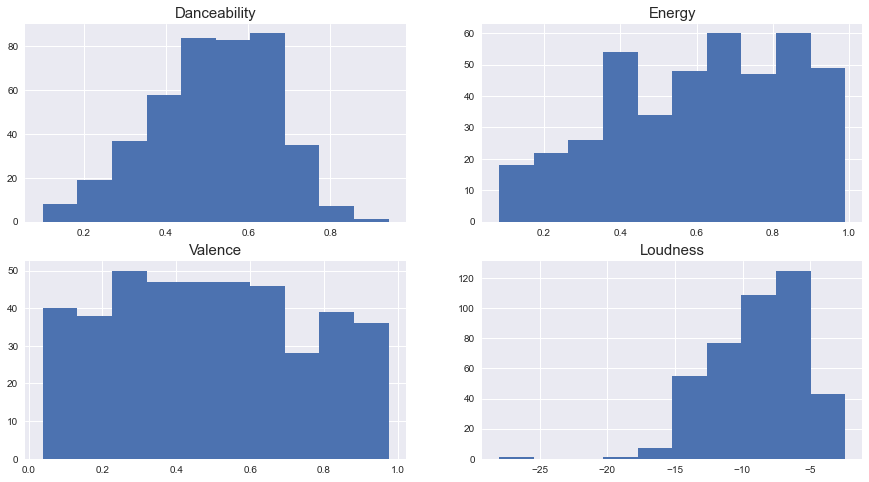

In [6]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

# Part 2. Building the Model

## K-Means Model

I decided to use K-means Clustering for Unsupervised Machine Learning due to the shape of my data (418 tracks ) and considering I want to create 2 playlists separating Relaxed tracks from Energetic tracks (K=2).
Important: I’m not using train and test data because in this case I just want to group all the tracks into 2 different groups to create playlists with the entire data.

For the K-Means, I need to define features and normalize the values of the model. I’ will use MinMaxScaler to preserve the shape of the original distribution and scale the features between a range from 0 to 1. Once I have the values in the correct format, I just simply create the K-Means model and then save the labels into the main Data Frame called “df”.

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [8]:
col_features = df.columns[6:]
X = MinMaxScaler().fit_transform(df[col_features])

In [9]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [10]:
df['kmeans'] = kmeans.labels_

I need to study the features of these labels, so I plot the tracks in a 3D Scatter and then I analyze the respective mean of each feature grouping the data frame by the K-Means result labels.

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

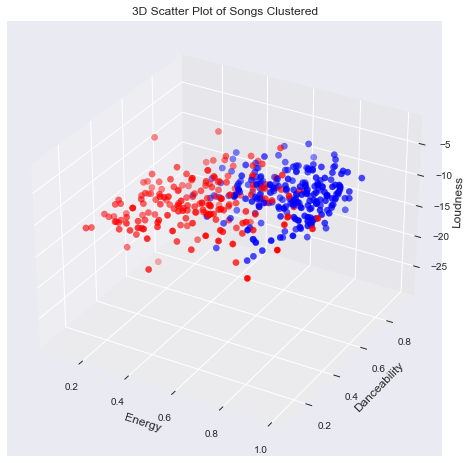

In [11]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [12]:
df.groupby(['kmeans']).mean()

,popularity,danceability,energy,valence,loudness
kmeans,,,,,
0,39.733333,0.564418,0.756391,0.678960,-7.705444
1,40.321244,0.449497,0.441674,0.269841,-10.142860


As I noticed on the graph the values are quite well grouped, blue values are located in label 0 and red values in label 1. Looking at the table of means, the label 0 grouped tracks with little more danceability, more energy, more valence, more loudness, so this one corresponds to Energetic songs, likewise, the label 1 has the Relaxed songs.

In [13]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]

In [14]:
cluster_0.to_csv("data/cluster0.csv",index=False)
cluster_1.to_csv("data/cluster1.csv",index=False)
df.to_csv("data/df.csv",index=False)

# Create New Customized Playlists for two Cluster

In [5]:
import spotipy
from spotipy import SpotifyClientCredentials, util
import pandas as pd

In [6]:
client_id='my_client_id'
client_secret='my_client_secret'
redirect_uri='my_redirect_uri'
username = 'my_username'
scope_playlist = 'playlist-modify-public'
scope_user = 'user-library-modify'
scope_playing = 'user-read-currently-playing'

#Credentials to access the Spotify Music Data
manager = SpotifyClientCredentials(client_id,client_secret)
sp = spotipy.Spotify(client_credentials_manager=manager)

#Credentials to access the actual song played
token_actual = util.prompt_for_user_token(username,scope_playing,client_id,client_secret,redirect_uri) 
sp_actual = spotipy.Spotify(auth=token_actual)

#Credentiasl to acces the library music 
token_user= util.prompt_for_user_token(username,scope_user,client_id,client_secret,redirect_uri) 
sp_user = spotipy.Spotify(auth=token_user)

#Credentiasl to acces the Playlists Music
token_playlist= util.prompt_for_user_token(username,scope_playlist,client_id,client_secret,redirect_uri) 
sp_playlist = spotipy.Spotify(auth=token_playlist)

In [11]:
cluster_0 = pd.read_csv("data/cluster0.csv")
cluster_1 = pd.read_csv("data/cluster1.csv")
ids_0 = cluster_0['id'].tolist()
ids_1 = cluster_1['id'].tolist()


In [8]:
ids_0_2 = ids_0[:100]
ids_0_3 = ids_0[100:200]
ids_0_4 = ids_0[200:]

ids_1_2 = ids_1[:100]
ids_1_3 = ids_1[100:]

In [12]:
Playlist_energy = sp_playlist.user_playlist_create(username,"Energy :)")
Playlist_relaxed = sp_playlist.user_playlist_create(username,"Relaxed :(")

In [13]:
#create playlist for Energy
sp_playlist.user_playlist_add_tracks(username,'6uulD4iMmRS7bUq0Qu8LWr',ids_0_2)
sp_playlist.user_playlist_add_tracks(username,'6uulD4iMmRS7bUq0Qu8LWr',ids_0_3)
sp_playlist.user_playlist_add_tracks(username,'6uulD4iMmRS7bUq0Qu8LWr',ids_0_4)
#create playlist for relax
sp_playlist.user_playlist_add_tracks(username,'7wM7lDruWDPw1ZsKAZ98lJ',ids_1_2)
sp_playlist.user_playlist_add_tracks(username,'7wM7lDruWDPw1ZsKAZ98lJ',ids_1_3)

{'snapshot_id': 'MywyNWYzZDJhYTcwYzI3ZmQ4NTQxNzNjN2NiZDhlMWVlMjc5MTA0Mzc4'}

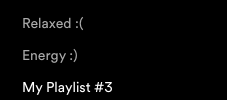